In [1]:
# !jupyter nbconvert --to script Inequal_test.ipynb

In [1]:
from qiskit import *
from math import pi, sqrt, floor
import numpy as np
import matplotlib.pyplot as plt
from qiskit.tools.monitor import job_monitor 
from qiskit.circuit.library import XGate, CXGate
from mpl_toolkits.mplot3d import Axes3D as ax
import clear
#IBMQ.load_account()

import warnings
warnings.filterwarnings('ignore')

In [2]:
def measurement_as_int(qc, job, shots):
    num_measurements = qc.num_clbits
    result = job.get_memory(0)
    a = []
    for c_size in range(num_measurements):
        tmp = []
        for i in range(shots):
            x = result[i][c_size]
            tmp.append(x)
        a.append(tmp)
    return a

In [3]:
def make_bell_test_circuit(circ, n, m):
    alice = 0
    alice_referee = 1
    bob = 2
    bob_referee = 3

    circ.h(alice)
    circ.cx(alice, bob)
    #circ.append(XGate().power(phi), [alice])
    circ.h(alice)
    circ.p(n, alice)
    circ.h(alice)
    circ.barrier()

    circ.h(alice_referee)
    circ.h(bob_referee)

    #circ.append(CXGate().power(2), [alice_referee, alice])
    circ.h(alice)
    circ.cp(m, alice_referee, alice)
    circ.h(alice)
    #circ.append(CXGate().power(2), [bob_referee, bob])
    circ.h(bob)
    circ.cp(m, bob_referee, bob)
    circ.h(bob)

    circ.measure_all()

    return circ

In [4]:
def main(n, m):
    qc = QuantumCircuit(4)
    make_bell_test_circuit(qc, n, m)
    repetitions = 100

    #provider = IBMQ.get_provider(hub='ibm-q')
    #backend = provider.get_backend('ibmq_vigo')
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=repetitions, optimization_level=3, memory=True)
    #job_monitor(job)
    job = job.result()

    a = measurement_as_int(qc, job=job, shots=repetitions)
    
    outcomes = []
    win_outcomes = []
    
    for i in range(repetitions):
        j = (int(a[0][i]) ^ int(a[2][i]) == int(a[1][i]) & int(a[3][i]))
        if j is True:
            outcomes.append('1')
            win_outcomes.append('1')
        else:
            outcomes.append('0')
            
    outcomes = ''.join(outcomes)
    win_percent = ( len(win_outcomes) / repetitions ) * 100
    
    return win_percent

In [39]:
if __name__ == '__main__':
    #variables
    xlength = 1.25
    ylength = 1.25
    stepc = 0.001
    search_radius = 9
    
    #declarations
    max_num = 0
    index = [0, 0]
    x = np.arange(-xlength, xlength, stepc)
    y = np.arange(-ylength, ylength, stepc)
    
    #log of maximum outcome with corresponding array space
    log = []
    index_log = []
    
    #initialize [0,0] which is middle of x and y
    newIndex = [round(len(x)/2), round(len(y)/2)]
    
    index_log.append(newIndex)
    
    ################################
    
    while True:
        index = newIndex
        
        #creates radius array around max index
        mIndex = []
        for i in range(-search_radius, search_radius+1):
            for j in range(-search_radius, search_radius+1):
                mIndex.append([i+index[0], j+index[1]])

        #calculates all M values around index
        cIndex = []
        for i in range(len(mIndex)):
            n = mIndex[i][0]
            p = mIndex[i][1]
            M = main(x[n], y[p])
            cIndex.append(M)
        
        #combine cIndex and mIndex to associate M value to index better
        #dictIndex = [[max_num, index[0], index[1]]]
        dictIndex = []
        for i in range(len(mIndex)):
            dictIndex.append([cIndex[i], mIndex[i][0], mIndex[i][1]])
        
        #check if any of our elements around index are larger
        for i in range(len(dictIndex)):
            if dictIndex[i][0] > max_num:
                max_num = dictIndex[i][0]
                newIndex = [dictIndex[i][1], dictIndex[i][2]]
                #index found values
                index_log.append(newIndex)
                log.append(max_num)
                
        if index == newIndex:
            break
            
    print('Maximum percentage found: ', max_num)
    print('Index of max_percentage: ', newIndex, x[newIndex[0]], y[newIndex[1]])
    print('Progression of values: ', log)
    print('Progression of Indexes:', index_log)
    print('Total steps taken: ', len(log))

Maximum percentage found:  68.0
Index of max_percentage:  [1256, 1252] 0.0059999999998616715 0.001999999999862112
Progression of values:  [50.0, 53.0, 57.99999999999999, 61.0, 63.0, 68.0]
Progression of Indexes: [[1250, 1250], [1241, 1241], [1241, 1243], [1241, 1244], [1241, 1246], [1249, 1241], [1256, 1252]]
Total steps taken:  6


[                     ] 
[ |                   ] 
[ | |                 ] 
[ | | |               ] 
[ | | | |             ] 
[ | | | | |           ] 
[ | | | | | |         ] 
[ | | | | | | |       ] 
[ | | | | | | | |     ] 
[ | | | | | | | | |   ] 
[ | | | | | | | | | | ] 


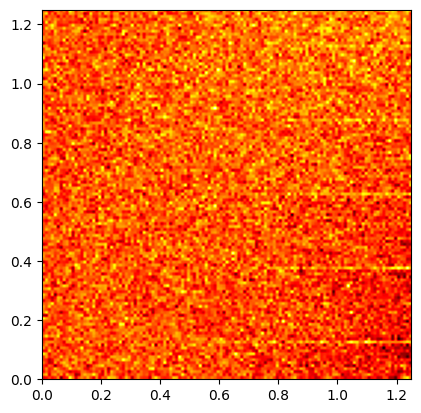

In [41]:
#Calulcates all elements then finds largest element
if __name__ == '__main__':
    #consts
    r = []
    pp = 0
    iteration = 1
    arr = ["[", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", "]"]
    for i in range(len(arr)):
        print(arr[i], end=' ')
    print()
    
    #variable
    xlength = 1.25
    ylength = 1.25
    stepc = 0.01
    
    x = np.arange(0, xlength, stepc)
    y = np.arange(0, ylength, stepc)
    max_reps = len(x)*len(y)
    
    for i in x:
        t = []
        for j in y:
            M = main(i, j)
            t.append(M)
            if M > 80:
                print(M, i, j)
            if pp == floor(max_reps/10)*iteration:
                arr[iteration] = '|'
                for i in range(len(arr)):
                    print(arr[i], end=' ')
                iteration = iteration + 1
                print()
            pp = pp + 1
        r.append(t)
    plot = plt.imshow(r, cmap='hot', interpolation='antialiased', extent=[0, xlength, 0, ylength])

In [43]:
max(max(r))

66.0